# Launch Turi Create

In [1]:
import turicreate

# Load house sales data

In [3]:
sales = turicreate.SFrame('home_data.sframe/')

In [4]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650.0,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000.0,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000.0,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080.0,1.0,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930.0,1.0,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819.0,2.0,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711.0,1.0,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470.0,1.0,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560.0,2.0,0


# Explore the data for house sales

In [10]:
turicreate.show(sales[1:5000]['sqft_living'],sales[1:5000]['price'], xlabel="Price", ylabel="sqft_living") #Scatter Plot

Materializing X axis SArray

Materializing Y axis SArray

# Simple regression model that predicts price from square feet

In [11]:
training_set, test_set = sales.random_split(.8,seed=0) #80% is training data and 20% test data

## Train simple regression model

In [14]:
sqft_model = turicreate.linear_regression.create(training_set,target='price',features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.012038     | 4351943.932873     | 1942975.961778       | 263516.988756                   | 251828.501087                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

# Evaluate the quality of our model

In [15]:
print (test_set['price'].mean())

543054.0425632532


In [16]:
print (sqft_model.evaluate(test_set))

{'max_error': 4145580.5382441883, 'rmse': 255196.9926500028}


# Explore model a little further

In [17]:
sqft_model.coefficients

name,index,value,stderr
(intercept),None,-47347.217469009105,5067.192787698521
sqft_living,None,281.7762061905784,2.2295055641621553


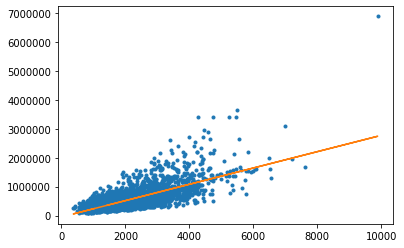

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(test_set['sqft_living'],test_set['price'],'.',
        test_set['sqft_living'],sqft_model.predict(test_set),'-')

# Explore other features of the data

In [19]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [20]:
sales[my_features].show()

Materializing SFrame

In [21]:
turicreate.show(sales['zipcode'],sales['price'])

Materializing X axis SArray

Materializing Y axis SArray

# Build a model with these additional features

In [46]:
my_features_model = turicreate.linear_regression.create(training_set,target='price',features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.027836     | 4077720.439056     | 1146763.589175       | 190746.664303                   | 157810.749519                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

# Compare simple model with more complex one

In [70]:
print (my_features)
sales[my_features].show()

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


Materializing SFrame

In [48]:
print (sqft_model.evaluate(test_set))
print (my_features_model.evaluate(test_set))

{'max_error': 4145580.5382441883, 'rmse': 255196.9926500028}
{'max_error': 3136292.390795787, 'rmse': 180516.52341678686}


# Apply learned models to make predictions

In [23]:
house1 = sales[sales['id']=='5309101200']

In [26]:
house1

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000.0 |   4.0    |    2.25   |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    2400.0   |  5350.0  |  1.5   |     0      |  0   |     4     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1460.0   |     940.0     |  1929.0  |     0.0      |  98117  | 47.67632376 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.37010126 |     1250.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="http://blue.kingcounty.com/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [25]:
print (house1['price'])

[620000.0, ... ]


In [22]:
print (sqft_model.predict(house1))

[629976.0401234042]


In [23]:
print (my_features_model.predict(house1))

[724495.9972504767]


## Prediction for a second house, a fancier one

In [24]:
house2 = sales[sales['id']=='1925069082']

In [25]:
house2

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000 |    5     |    4.25   |     4640    |
+------------+---------------------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|  22703   |   2    |     1      |  4   |     5     |   8   |    2860    |      1780     |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1952   |      0       |  98052  | 47.63925783 | -122.09722322 |     3140.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [26]:
print (sqft_model.predict(house2))

[1263438.8662907984]


In [27]:
print (my_features_model.predict(house2))

[1442070.3235753486]


## Prediction for a super fancy home

In [28]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Residence_of_Bill_Gates.jpg">

In [29]:
print (my_features_model.predict(turicreate.SFrame(bill_gates)))

[13491984.465966508]


# Quiz 2

In [83]:
data_set = sales[sales['zipcode']=='98039']

In [84]:
data_set

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
3625049014,2014-08-29 00:00:00+00:00,2950000.0,4.0,3.5,4860.0,23885.0,2.0,0
2540700110,2015-02-12 00:00:00+00:00,1905000.0,4.0,3.5,4210.0,18564.0,2.0,0
3262300940,2014-11-07 00:00:00+00:00,875000.0,3.0,1.0,1220.0,8119.0,1.0,0
3262300940,2015-02-10 00:00:00+00:00,940000.0,3.0,1.0,1220.0,8119.0,1.0,0
6447300265,2014-10-14 00:00:00+00:00,4000000.0,4.0,5.5,7080.0,16573.0,2.0,0
2470100110,2014-08-04 00:00:00+00:00,5570000.0,5.0,5.75,9200.0,35069.0,2.0,0
2210500019,2015-03-24 00:00:00+00:00,937500.0,3.0,1.0,1320.0,8500.0,1.0,0
6447300345,2015-04-06 00:00:00+00:00,1160000.0,4.0,3.0,2680.0,15438.0,2.0,0
6447300225,2014-11-06 00:00:00+00:00,1880000.0,3.0,2.75,2620.0,17919.0,1.0,0
2525049148,2014-10-07 00:00:00+00:00,3418800.0,5.0,5.0,5450.0,20412.0,2.0,0


In [86]:
total=0
for i in range(0,len(data_set)):
    total+=int(data_set['price'][i])
avg=total/len(data_set)
print(avg)

2160606.6


In [37]:
data_set2= sales['sqft_living'].filter(lambda x: x>2000 and x<=4000)
print (data_set2)

[2570.0, 3560.0, 2950.0, 3050.0, 2270.0, 2450.0, 2450.0, 2570.0, 2320.0, 2330.0, 2060.0, 2300.0, 2360.0, 2620.0, 2570.0, 3595.0, 3160.0, 2290.0, 2753.0, 3150.0, 2730.0, 2830.0, 2250.0, 2420.0, 3250.0, 2150.0, 2519.0, 2770.0, 2720.0, 2240.0, 3200.0, 2750.0, 2380.0, 3430.0, 3450.0, 2350.0, 2020.0, 2140.0, 2660.0, 2770.0, 3520.0, 3300.0, 2320.0, 2070.0, 2190.0, 2920.0, 2340.0, 3140.0, 2030.0, 2310.0, 2080.0, 3230.0, 2400.0, 2100.0, 2910.0, 2750.0, 2100.0, 2160.0, 2320.0, 2070.0, 2010.0, 3950.0, 2010.0, 2140.0, 2020.0, 2590.0, 2820.0, 2030.0, 3670.0, 2550.0, 2420.0, 2260.0, 3960.0, 2640.0, 2060.0, 3400.0, 2020.0, 2680.0, 2680.0, 2160.0, 3880.0, 2590.0, 2380.0, 2440.0, 3130.0, 2230.0, 2140.0, 2180.0, 2150.0, 2480.0, 2440.0, 2300.0, 2240.0, 2714.0, 3300.0, 2250.0, 3900.0, 2760.0, 2330.0, 2220.0, ... ]


In [39]:
data_set2

dtype: float
Rows: 9118
[2570.0, 3560.0, 2950.0, 3050.0, 2270.0, 2450.0, 2450.0, 2570.0, 2320.0, 2330.0, 2060.0, 2300.0, 2360.0, 2620.0, 2570.0, 3595.0, 3160.0, 2290.0, 2753.0, 3150.0, 2730.0, 2830.0, 2250.0, 2420.0, 3250.0, 2150.0, 2519.0, 2770.0, 2720.0, 2240.0, 3200.0, 2750.0, 2380.0, 3430.0, 3450.0, 2350.0, 2020.0, 2140.0, 2660.0, 2770.0, 3520.0, 3300.0, 2320.0, 2070.0, 2190.0, 2920.0, 2340.0, 3140.0, 2030.0, 2310.0, 2080.0, 3230.0, 2400.0, 2100.0, 2910.0, 2750.0, 2100.0, 2160.0, 2320.0, 2070.0, 2010.0, 3950.0, 2010.0, 2140.0, 2020.0, 2590.0, 2820.0, 2030.0, 3670.0, 2550.0, 2420.0, 2260.0, 3960.0, 2640.0, 2060.0, 3400.0, 2020.0, 2680.0, 2680.0, 2160.0, 3880.0, 2590.0, 2380.0, 2440.0, 3130.0, 2230.0, 2140.0, 2180.0, 2150.0, 2480.0, 2440.0, 2300.0, 2240.0, 2714.0, 3300.0, 2250.0, 3900.0, 2760.0, 2330.0, 2220.0, ... ]

In [78]:
print("Fraction of houses lying in the ranfe of 2000 to 4000 sqfeet are: " + str((9118/21613)) )

Fraction of houses lying in the ranfe of 2000 to 4000 sqfeet are: 0.42187572294452413


In [50]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

adv_features_model = turicreate.linear_regression.create(training_set,target='price',features=advanced_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 87

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.065313     | 4321728.146087     | 1413018.443988       | 162578.479840                   | 159332.835241                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [53]:
print (sqft_model.evaluate(test_set))
print (my_features_model.evaluate(test_set))
print(adv_features_model.evaluate(test_set))

{'max_error': 4145580.5382441883, 'rmse': 255196.9926500028}
{'max_error': 3136292.390795787, 'rmse': 180516.52341678686}
{'max_error': 3159770.688280585, 'rmse': 155509.27671364986}


In [54]:
print ("Difference between RMSE of my_features and advanced_features models is: "+ str(180516.52341678686-155509.27671364986))

Difference between RMSE of my_features and advanced_features models is: 25007.246703137003
